# Importing Libraries

In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Importing Data

### Covid Data

In [2]:
covid_daily_cases = pd.read_csv('COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv')

In [3]:
covid_daily_cases.Date = pd.to_datetime(covid_daily_cases.Date)
covid_daily_cases = covid_daily_cases.sort_values(by="Date")
covid_daily_cases = covid_daily_cases.iloc[:, :2]
covid_daily_cases.reset_index(inplace=True, drop=True)
covid_daily_cases["Cumulative"] = covid_daily_cases.iloc[:,1].cumsum()

In [4]:
covid_daily_cases

,Date,Cases - Total,Cumulative
0,2020-03-01,0,0
1,2020-03-02,0,0
2,2020-03-03,0,0
3,2020-03-04,0,0
4,2020-03-05,1,1
...,...,...,...
349,2021-02-13,214,240244
350,2021-02-14,105,240349
351,2021-02-15,95,240444
352,2021-02-16,2,240446


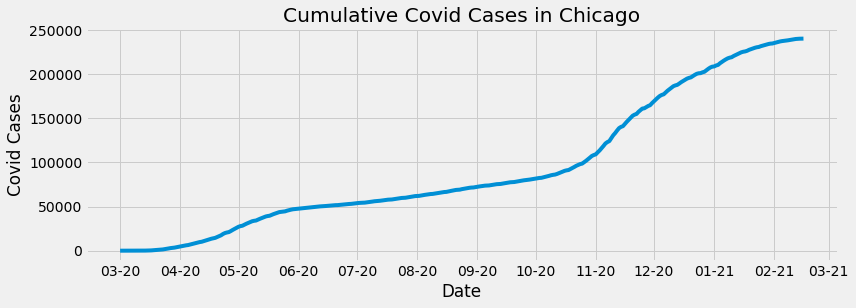

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(covid_daily_cases.Date, covid_daily_cases.Cumulative)
ax.set(xlabel="Date",
       ylabel="Covid Cases",
       title="Cumulative Covid Cases in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

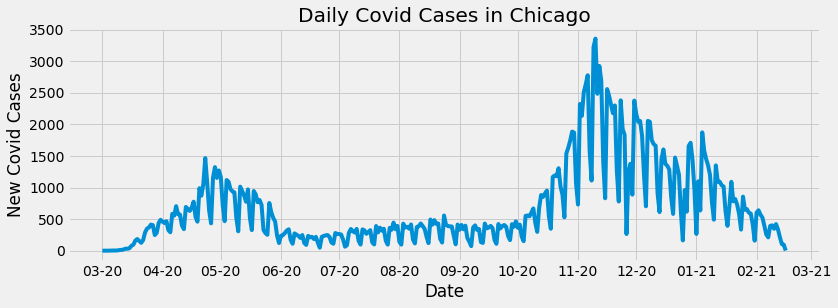

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(covid_daily_cases.Date, covid_daily_cases["Cases - Total"])
ax.set(xlabel="Date",
       ylabel="New Covid Cases",
       title="Daily Covid Cases in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### "L" Rides

In [7]:
l_df = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')

In [8]:
l_df.date = pd.to_datetime(l_df.date)

In [9]:
l_df = l_df[(l_df.date.dt.year > 2018)]

In [10]:
l_df = l_df.groupby("date").sum().drop(columns='station_id').reset_index()

In [11]:
l_df

,date,rides
0,2019-01-01,199888
1,2019-01-02,469789
2,2019-01-03,514216
3,2019-01-04,514817
4,2019-01-05,279731
...,...,...
634,2020-09-26,109677
635,2020-09-27,83305
636,2020-09-28,131279
637,2020-09-29,138623


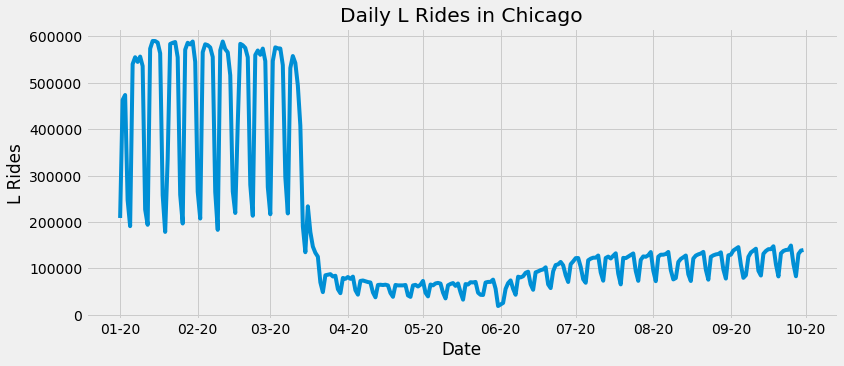

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
filter_df = l_df[l_df.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="L Rides",
       title="Daily L Rides in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### Bus Data

In [13]:
bus_df = pd.read_csv('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')

In [14]:
bus_df.date = pd.to_datetime(bus_df.date)
bus_df = bus_df[(bus_df.date.dt.year > 2018)]

In [15]:
bus_df = bus_df.groupby("date").sum().reset_index()

In [16]:
bus_df

,date,rides
0,2019-01-01,247279
1,2019-01-02,585996
2,2019-01-03,660631
3,2019-01-04,662011
4,2019-01-05,440848
...,...,...
634,2020-09-26,238224
635,2020-09-27,176309
636,2020-09-28,297845
637,2020-09-29,319813


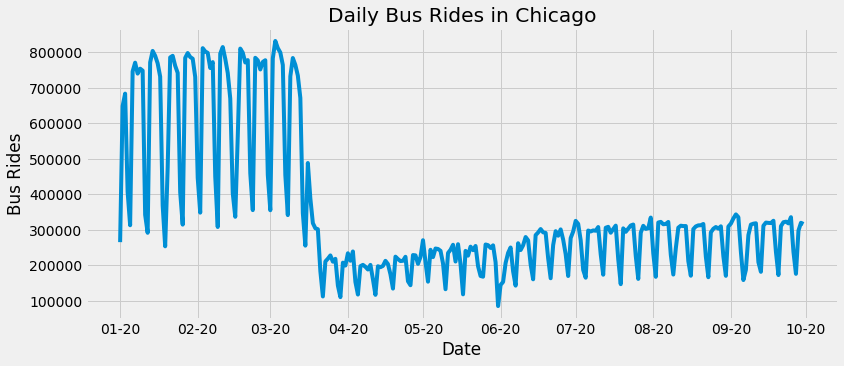

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
filter_df = bus_df[bus_df.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="Bus Rides",
       title="Daily Bus Rides in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### Divvy Rides

In [18]:
divvy_2020q1 = pd.read_csv('Divvy_Trips_2020_Q1.csv')
divvy_2020april = pd.read_csv('202004-divvy-tripdata.csv')
divvy_2020may = pd.read_csv('202005-divvy-tripdata.csv')
divvy_2020june = pd.read_csv('202006-divvy-tripdata.csv')
divvy_2020july = pd.read_csv('202007-divvy-tripdata.csv')
divvy_2020august = pd.read_csv('202008-divvy-tripdata.csv')
divvy_2020sept = pd.read_csv('202009-divvy-tripdata.csv')
divvy_2020oct = pd.read_csv('202010-divvy-tripdata.csv')

In [19]:
divvy_2019q1 = pd.read_csv('Divvy_Trips_2019_Q1')
divvy_2019q2 = pd.read_csv('Divvy_Trips_2019_Q2')
divvy_2019q3 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
divvy_2019q4 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

In [20]:
divvy_2019 = pd.concat([divvy_2019q1, divvy_2019q3, divvy_2019q4], ignore_index = True)

In [21]:
divvy_2020 = pd.concat([divvy_2020q1, 
                      divvy_2020april, divvy_2020may, divvy_2020june, divvy_2020july, divvy_2020august, 
                      divvy_2020sept, divvy_2020oct], ignore_index = True)

In [22]:
divvy_2019

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2709836,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
2709837,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
2709838,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
2709839,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0


In [23]:
divvy_2019["date"] = pd.to_datetime(divvy_2019.iloc[:, 1]).dt.normalize()
divvy_2020["date"] = pd.to_datetime(divvy_2020.started_at).dt.normalize()
divvy_2019q2["date"] = pd.to_datetime(divvy_2019q2.iloc[:, 1]).dt.normalize()

In [24]:
divvy_2019 = divvy_2019.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")
divvy_2020 = divvy_2020.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")
divvy_2019q2 = divvy_2019q2.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")

In [25]:
divvy_2019 = pd.concat([divvy_2019, divvy_2019q2], ignore_index = True).sort_values(by="date")

In [26]:
divvy_df = pd.concat([divvy_2019, divvy_2020], ignore_index = True)

In [27]:
divvy_df

,date,rides
0,2019-01-01,1312
1,2019-01-02,4170
2,2019-01-03,5618
3,2019-01-04,6793
4,2019-01-05,6179
...,...,...
663,2020-10-27,6178
664,2020-10-28,9661
665,2020-10-29,8139
666,2020-10-30,9378


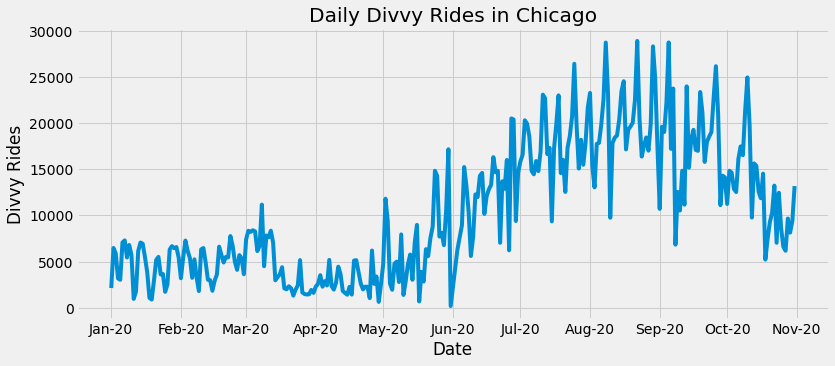

In [28]:
fig, ax = plt.subplots(figsize=(12, 5))
filter_df = divvy_df[divvy_df.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="Divvy Rides",
       title="Daily Divvy Rides in Chicago")

date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

## Cutting the Dataframe

In [29]:
print(divvy_df.tail())
print(covid_daily_cases.tail())
print(bus_df.tail())
print(l_df.tail())

          date  rides
663 2020-10-27   6178
664 2020-10-28   9661
665 2020-10-29   8139
666 2020-10-30   9378
667 2020-10-31  13179
          Date  Cases - Total  Cumulative
349 2021-02-13            214      240244
350 2021-02-14            105      240349
351 2021-02-15             95      240444
352 2021-02-16              2      240446
353        NaT            525      240971
          date   rides
634 2020-09-26  238224
635 2020-09-27  176309
636 2020-09-28  297845
637 2020-09-29  319813
638 2020-09-30  316420
          date   rides
634 2020-09-26  109677
635 2020-09-27   83305
636 2020-09-28  131279
637 2020-09-29  138623
638 2020-09-30  139805


The bus and L data only runs all the way to 2020-09-30, so we want to cut all our datasets to that date to make comparisons easier and consistent.

In [30]:
covid_df = covid_daily_cases[covid_daily_cases.Date <= '2020-09-30']
covid_df = covid_df.rename(columns = {"Date": "date", "Cases - Total":"daily_cases", "Cumulative": "cumulative"})

In [31]:
divvy_df = divvy_df[divvy_df.date <= '2020-09-30']
divvy_2019 = divvy_df[divvy_df.date.dt.year == 2019]
divvy_2020 = divvy_df[divvy_df.date.dt.year == 2020]
divvy_2019 = divvy_2019[divvy_2019.date.dt.month <= 9]
divvy_2020 = divvy_2020.reset_index(drop=True)

In [32]:
bus_2019 = bus_df[bus_df.date.dt.year == 2019]
bus_2020 = bus_df[bus_df.date.dt.year == 2020]
bus_2019 = bus_2019[bus_2019.date.dt.month <= 9]
bus_2020 = bus_2020.reset_index(drop=True)

In [33]:
l_2019 = l_df[l_df.date.dt.year == 2019]
l_2020 = l_df[l_df.date.dt.year == 2020]
l_2019 = l_2019[l_2019.date.dt.month <= 9]
l_2020 = l_2020.reset_index(drop=True)

## Plotting the share of bike rides in 2019 vs 2020

In [34]:
combined2019_df = l_2019.merge(bus_2019, on = 'date', suffixes = ['_l', '_bus'])
combined2019_df = combined2019_df.merge(divvy_2019, on = 'date')
combined2019_df.rename(columns = {'rides': 'rides_divvy'}, inplace=True)
combined2019_df

,date,rides_l,rides_bus,rides_divvy
0,2019-01-01,199888,247279,1312
1,2019-01-02,469789,585996,4170
2,2019-01-03,514216,660631,5618
3,2019-01-04,514817,662011,6793
4,2019-01-05,279731,440848,6179
...,...,...,...,...
268,2019-09-26,653519,847678,19256
269,2019-09-27,578027,729737,9091
270,2019-09-28,321772,473142,9362
271,2019-09-29,238705,352196,8282


In [35]:
combined2019_df["bike_percent"] = combined2019_df.rides_divvy / (combined2019_df.rides_l + combined2019_df.rides_bus + combined2019_df.rides_divvy) * 100
combined2019_df["ridership_ratio"] = (combined2019_df.rides_l + combined2019_df.rides_bus) / combined2019_df.rides_divvy

In [36]:
combined2020_df = l_2020.merge(bus_2020, on = 'date', suffixes = ['_l', '_bus'])
combined2020_df = combined2020_df.merge(divvy_2020, on = 'date')
combined2020_df.rename(columns = {'rides': 'rides_divvy'}, inplace=True)
combined2020_df

,date,rides_l,rides_bus,rides_divvy
0,2020-01-01,208791,265403,2141
1,2020-01-02,462906,647885,6479
2,2020-01-03,473606,682899,5890
3,2020-01-04,247309,406896,3187
4,2020-01-05,191155,312920,3035
...,...,...,...,...
267,2020-09-26,109677,238224,26150
268,2020-09-27,83305,176309,20874
269,2020-09-28,131279,297845,11110
270,2020-09-29,138623,319813,14294


In [37]:
combined2020_df.iloc[151, 3] = 17162

In [38]:
combined2020_df["bike_percent"] = combined2020_df.rides_divvy / (combined2020_df.rides_l + combined2020_df.rides_bus + combined2020_df.rides_divvy) * 100
combined2020_df["ridership_ratio"] = (combined2020_df.rides_l + combined2020_df.rides_bus) / combined2020_df.rides_divvy

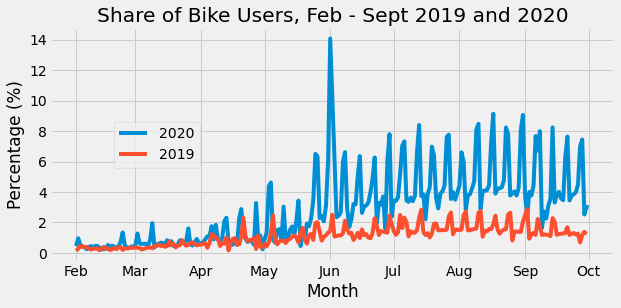

In [39]:
fig, ax = plt.subplots(figsize=(9, 4))
filter_df = combined2020_df[combined2020_df.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.bike_percent, label = "2020")
filter_df = combined2019_df[combined2019_df.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.bike_percent, label = "2019")

ax.set(xlabel="Month",
       ylabel="Percentage (%)",
       title="Share of Bike Users, Feb - Sept 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="center left", bbox_to_anchor=(0.1, 0.5), ncol=1)

plt.show()

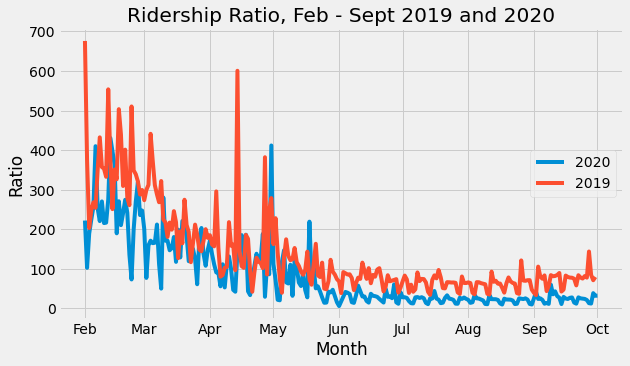

In [40]:
fig, ax = plt.subplots(figsize=(9, 5))
filter_df = combined2020_df[combined2020_df.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.ridership_ratio, label = "2020")
filter_df = combined2019_df[combined2019_df.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.ridership_ratio, label = "2019")

ax.set(xlabel="Month",
       ylabel="Ratio",
       title="Ridership Ratio, Feb - Sept 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="center right", ncol=1)

plt.show()

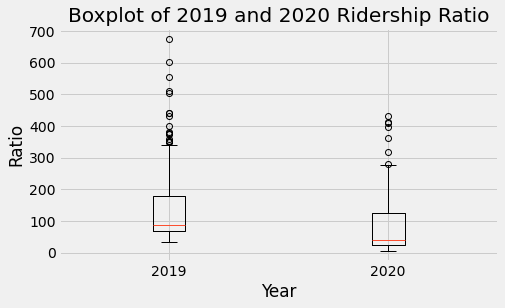

In [48]:
plt.figure(figsize=(7,4))
plt.boxplot([combined2019_df[combined2019_df.date.dt.month >= 2]["ridership_ratio"], 
               combined2020_df[combined2020_df.date.dt.month >= 2]["ridership_ratio"]],
              labels = ("2019", "2020"))
plt.title("Boxplot of 2019 and 2020 Ridership Ratio")
plt.ylabel("Ratio")
plt.xlabel("Year");

## Plotting the ridership trend of the three modes of transit in 2019 vs 2020

In [42]:
bus_2019['daymonth'] = bus_2019['date'].dt.strftime('%m-%d')
bus_2020['daymonth'] = bus_2020['date'].dt.strftime('%m-%d')
bus_combined = bus_2019.merge(bus_2020, on = 'daymonth', suffixes = ['_2019', '_2020'])

In [43]:
bus_combined

,date_2019,rides_2019,daymonth,date_2020,rides_2020
0,2019-01-01,247279,01-01,2020-01-01,265403
1,2019-01-02,585996,01-02,2020-01-02,647885
2,2019-01-03,660631,01-03,2020-01-03,682899
3,2019-01-04,662011,01-04,2020-01-04,406896
4,2019-01-05,440848,01-05,2020-01-05,312920
...,...,...,...,...,...
268,2019-09-26,847678,09-26,2020-09-26,238224
269,2019-09-27,729737,09-27,2020-09-27,176309
270,2019-09-28,473142,09-28,2020-09-28,297845
271,2019-09-29,352196,09-29,2020-09-29,319813


In [44]:
l_2019['daymonth'] = l_2019['date'].dt.strftime('%m-%d')
l_2020['daymonth'] = l_2020['date'].dt.strftime('%m-%d')
l_combined = l_2019.merge(l_2020, on = 'daymonth', suffixes = ['_2019', '_2020'])

In [45]:
l_combined

,date_2019,rides_2019,daymonth,date_2020,rides_2020
0,2019-01-01,199888,01-01,2020-01-01,208791
1,2019-01-02,469789,01-02,2020-01-02,462906
2,2019-01-03,514216,01-03,2020-01-03,473606
3,2019-01-04,514817,01-04,2020-01-04,247309
4,2019-01-05,279731,01-05,2020-01-05,191155
...,...,...,...,...,...
268,2019-09-26,653519,09-26,2020-09-26,109677
269,2019-09-27,578027,09-27,2020-09-27,83305
270,2019-09-28,321772,09-28,2020-09-28,131279
271,2019-09-29,238705,09-29,2020-09-29,138623


In [46]:
divvy_2019.insert(0, "daymonth", divvy_2019['date'].dt.strftime('%m-%d'))
divvy_2020.insert(0, "daymonth", divvy_2020['date'].dt.strftime('%m-%d'))
divvy_combined = divvy_2019.merge(divvy_2020, on = 'daymonth', suffixes = ['_2019', '_2020'])

#### Relative Change (Not that useful due to differences in weekend and weekdays for the same date-month of different years)
##### Use Weekly Relative Change on Another Notebook

In [47]:
bus_combined['relative_change'] = (bus_combined.rides_2020 - bus_combined.rides_2019) / bus_combined.rides_2019 * 100
l_combined['relative_change'] = (l_combined.rides_2020 - l_combined.rides_2019) / l_combined.rides_2019 * 100
divvy_combined['relative_change'] = (divvy_combined.rides_2020 - divvy_combined.rides_2019) / divvy_combined.rides_2019 * 100

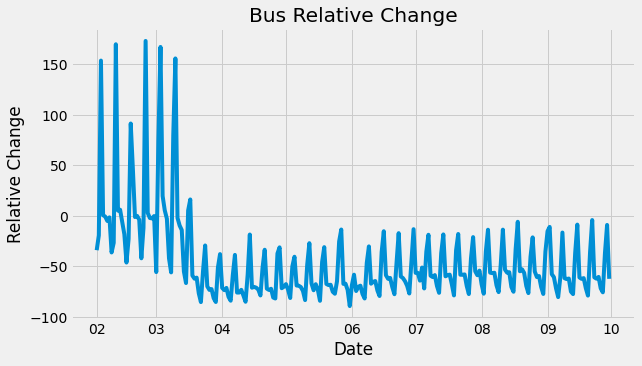

In [48]:
fig, ax = plt.subplots(figsize=(9,5))
filter_df = bus_combined[bus_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019, filter_df.relative_change)
ax.set(xlabel="Date",
       ylabel="Relative Change",
       title="Bus Relative Change")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

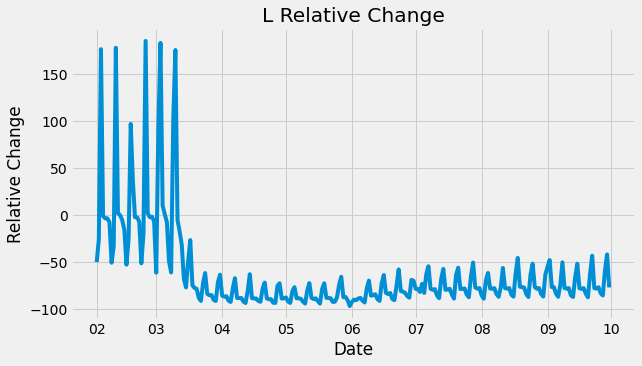

In [49]:
fig, ax = plt.subplots(figsize=(9,5))
filter_df = l_combined[l_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019, filter_df.relative_change)
ax.set(xlabel="Date",
       ylabel="Relative Change",
       title="L Relative Change")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

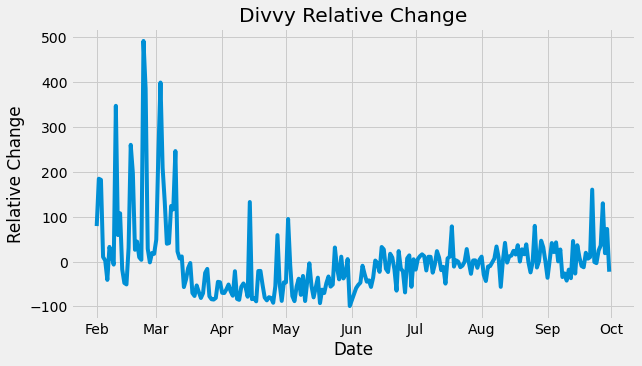

In [50]:
fig, ax = plt.subplots(figsize=(9,5))
filter_df = divvy_combined[divvy_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019, filter_df.relative_change)
ax.set(xlabel="Date",
       ylabel="Relative Change",
       title="Divvy Relative Change")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

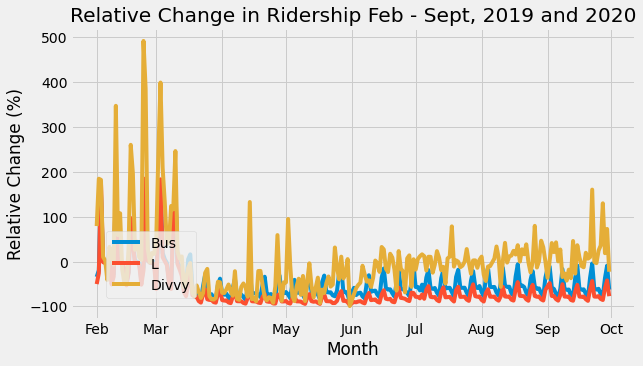

In [51]:
fig, ax = plt.subplots(figsize=(9,5))
filter_df = bus_combined[bus_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019, filter_df.relative_change, label = 'Bus')
filter_df = l_combined[l_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019, filter_df.relative_change, label =  'L')
filter_df = divvy_combined[divvy_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019, filter_df.relative_change, label = 'Divvy')

ax.set(xlabel="Month",
       ylabel="Relative Change (%)",
       title="Relative Change in Ridership Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower left", bbox_to_anchor=(0.05, 0.05), ncol=1)
plt.show()

## Plotting Actual Ridership Trends Across Time in 2019 vs 2020 (More Useful)

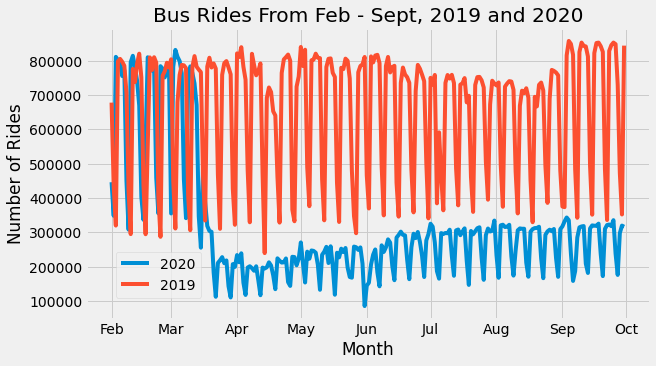

In [52]:
fig, ax = plt.subplots(figsize=(9, 5))
filter_df = bus_combined[bus_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019.dt.dayofyear, filter_df.rides_2020, label = "2020")
ax.plot(filter_df.date_2019.dt.dayofyear, filter_df.rides_2019, label = "2019")


ax.set(xlabel="Month",
       ylabel="Number of Rides",
       title="Bus Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower left", bbox_to_anchor=(0.04, 0.05), ncol=1)
plt.show()

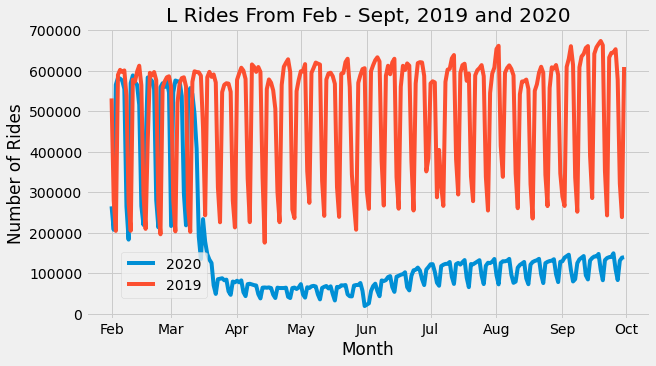

In [53]:
fig, ax = plt.subplots(figsize=(9, 5))
filter_df = l_combined[l_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019.dt.dayofyear, filter_df.rides_2020, label = "2020")
ax.plot(filter_df.date_2019.dt.dayofyear, filter_df.rides_2019, label = "2019")

ax.set(xlabel="Month",
       ylabel="Number of Rides",
       title="L Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower left", bbox_to_anchor=(0.05, 0.05), ncol=1)
plt.show()

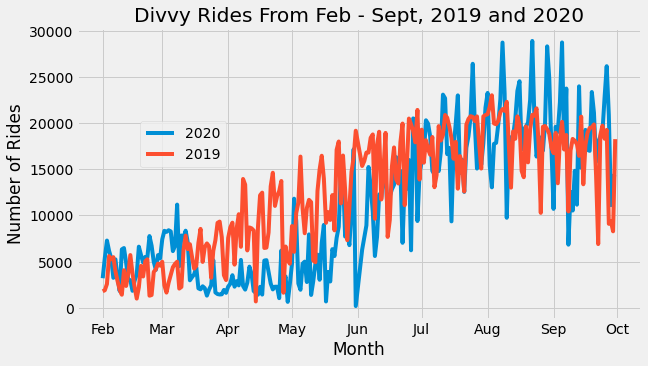

In [54]:
fig, ax = plt.subplots(figsize=(9, 5))
filter_df = divvy_combined[divvy_combined.date_2019.dt.month >= 2]
ax.plot(filter_df.date_2019.dt.dayofyear, filter_df.rides_2020, label = "2020")
ax.plot(filter_df.date_2019.dt.dayofyear, filter_df.rides_2019, label = "2019")

ax.set(xlabel="Month",
       ylabel="Number of Rides",
       title="Divvy Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="center left", bbox_to_anchor=(0.1, 0.6), ncol=1)
plt.show()

## A/B Testing: 2019 vs 2020 Bike Share

In [55]:
filter_2020 = combined2020_df[combined2020_df.date.dt.month >= 3]
filter_2020.insert(5, "label", [2020] * filter_2020.shape[0])

In [56]:
filter_2019 = combined2019_df[combined2019_df.date.dt.month >= 3]
filter_2019.insert(5, "label", [2019] * filter_2019.shape[0])

In [57]:
bike_share = pd.concat([filter_2019.bike_percent, filter_2020.bike_percent], ignore_index = True)

In [58]:
labels = pd.concat([filter_2019.label, filter_2020.label], ignore_index = True)

In [59]:
main_table = pd.DataFrame({"label": labels, "bike_share": bike_share})

In [60]:
mean_table = main_table.groupby('label').mean()
mean_table

,bike_share
label,
2019,1.222825
2020,3.246943


In [61]:
observed_difference = mean_table.bike_share[2020] - mean_table.bike_share[2019]

In [62]:
observed_difference

2.024117731150236

In [63]:
differences = make_array()

for i in np.arange(10000):
    shuffled_share = main_table.bike_share.sample(main_table.shape[0], replace = False).reset_index(drop=True)
    shuffled_tbl = pd.DataFrame({'label': labels, 'shuffled_share': shuffled_share})
    means_tbl = shuffled_tbl.groupby('label').mean()
    new_diff = means_tbl.shuffled_share[2020] - means_tbl.shuffled_share[2019]
    differences = np.append(differences, new_diff)

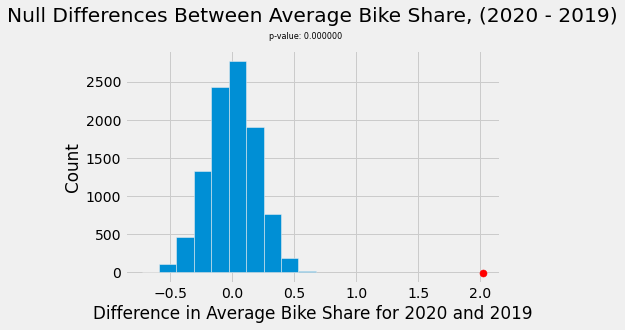

In [64]:
plt.scatter(observed_difference, -5, color='red', s=50)
plt.hist(differences)
plt.title("Null Differences Between Average Bike Share, (2020 - 2019)\n")
p_value = np.count_nonzero(differences >= observed_difference) / 10000
plt.suptitle("\np-value: %f" % p_value, fontsize=8)
plt.ylabel("Count")
plt.xlabel("Difference in Average Bike Share for 2020 and 2019")
plt.show()

The p-value is basically 0, meaning that a difference of approximately 1.7 % in the share of bikes as a mode of transit between the year 2020 and 2019 is not due to chance. This proves that the share of bikes in 2020 is indeed larger than 2019, and the result is statiscally significant at more than 99% confidence level. Assuming that the only conditions that are different between the years 2020 and 2019 is the pressence of the novel coronavirus Covid-19, this shows that Covid 19 is associated with higher shares of bike riding. However, it should be noted that this assumption might not be 100% accurate since factors such as weather, etc. might be slightly different between the two years. 

## A/B Testing: 2019 vs 2020 Ridership Ratio

In [65]:
filter_2020 = combined2020_df[combined2020_df.date.dt.month >= 3]
filter_2020.insert(5, "label", [2020] * filter_2020.shape[0])

In [66]:
filter_2019 = combined2019_df[combined2019_df.date.dt.month >= 3]
filter_2019.insert(5, "label", [2019] * filter_2019.shape[0])

In [67]:
ridership_ratio = pd.concat([filter_2019.ridership_ratio, filter_2020.ridership_ratio], ignore_index = True)

In [68]:
labels = pd.concat([filter_2019.label, filter_2020.label], ignore_index = True)

In [69]:
main_table = pd.DataFrame({"label": labels, "ridership_ratio": ridership_ratio})

In [71]:
median_table = main_table.groupby('label').median()
median_table

,ridership_ratio
label,
2019,82.581557
2020,31.084101


In [72]:
observed_difference = median_table.ridership_ratio[2020] - median_table.ridership_ratio[2019]

In [73]:
observed_difference

-51.49745567247547

In [74]:
differences = make_array()

for i in np.arange(10000):
    shuffled_ratio = main_table.ridership_ratio.sample(main_table.shape[0], replace = False).reset_index(drop=True)
    shuffled_tbl = pd.DataFrame({'label': labels, 'shuffled_ratio': shuffled_ratio})
    median_tbl = shuffled_tbl.groupby('label').median()
    new_diff = median_tbl.shuffled_ratio[2020] - median_tbl.shuffled_ratio[2019]
    differences = np.append(differences, new_diff)

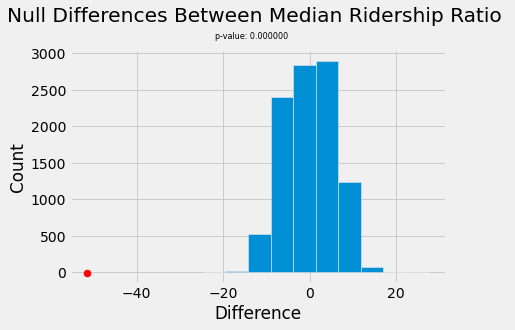

In [89]:
plt.scatter(observed_difference, -5, color='red', s=50)
plt.hist(differences)
plt.title("Null Differences Between Median Ridership Ratio \n")
p_value = np.count_nonzero(differences <= observed_difference) / 10000
plt.suptitle("\np-value: %f" % p_value, fontsize=8)
plt.ylabel("Count")
plt.xlabel("Difference")
plt.show()

The p-value is 0, meaning that a difference of approximately 48x in the ridership ratio between the year 2020 and 2019 is not due to chance. This proves that ridership ratio in 2020 is indeed larger than 2019, and the result is statiscally significant at more than a 99% confidence level.

Assuming that the only conditions that are different between the years 2020 and 2019 is the pressence of the novel coronavirus Covid-19, this shows that bike ridership is more resilient to reduction in mobility caused by the virus compared to non-bike public transportations. However, it should be noted that this assumption might not be 100% accurate since factors such as weather, etc. might be slightly different between the two years. 

### Regression between Ridership Ratio vs daily covid cases +  temperature

In [76]:
feb_dates = combined2020_df[combined2020_df.date.dt.month <= 2].date.reset_index(drop=True)

In [77]:
upper_df = pd.DataFrame({"date": feb_dates, "daily_cases": np.zeros(feb_dates.shape[0]),
                        "cumulative": np.zeros(feb_dates.shape[0])})

In [78]:
# Added January and February Rows to the Covid df
extended_covid_df = pd.concat([upper_df, covid_df], ignore_index = True)

In [79]:
# Merged covid and bike share data
covid_bike_share = pd.merge(combined2020_df, extended_covid_df, on = 'date')

In [80]:
# Added weather data to control for temperature changes that might also affect the share of bikes
# Warmer temperature tend to lead to more bike users
weather_df = pd.read_csv('weather.csv')

In [81]:
weather_df = weather_df[["DATE", "TAVG"]]
weather_df["date"] = pd.to_datetime(weather_df.DATE)
weather_df = weather_df[weather_df.TAVG.notnull()]
weather_df = weather_df[weather_df.date <= '2020-09-30'].reset_index(drop=True)

In [82]:
covid_bike_weather = pd.merge(covid_bike_share, weather_df, on='date')
covid_bike_weather.drop(columns=['DATE'], inplace=True)

In [85]:
covid_bike_weather.rename(columns={'TAVG': 'avg_temp'}, inplace=True)

In [86]:
filter_df = covid_bike_weather[covid_bike_weather.date.dt.month >= 2]

In [87]:
x = filter_df.loc[:, ["daily_cases", "avg_temp"]]
y = filter_df.ridership_ratio

In [88]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        ridership_ratio   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     255.7
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           5.33e-60
Time:                        15:26:07   Log-Likelihood:                -1283.0
No. Observations:                 241   AIC:                             2572.
Df Residuals:                     238   BIC:                             2583.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         330.1197     11.432     28.877      

# Weekly Analysis

# Importing Data

### Covid Data

In [2]:
covid_daily_cases = pd.read_csv('COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv')

In [3]:
covid_daily_cases.Date = pd.to_datetime(covid_daily_cases.Date)
covid_daily_cases = covid_daily_cases.sort_values(by="Date")
covid_daily_cases = covid_daily_cases.iloc[:, :2]
covid_daily_cases.reset_index(inplace=True, drop=True)
covid_daily_cases["Cumulative"] = covid_daily_cases.iloc[:,1].cumsum()

In [106]:
covid_daily_cases

,Date,Cases - Total,Cumulative
0,2020-03-01,0,0
1,2020-03-02,0,0
2,2020-03-03,0,0
3,2020-03-04,0,0
4,2020-03-05,1,1
...,...,...,...
349,2021-02-13,214,240244
350,2021-02-14,105,240349
351,2021-02-15,95,240444
352,2021-02-16,2,240446


In [4]:
covid_weekly = covid_daily_cases.set_index(covid_daily_cases.Date)
covid_weekly = covid_weekly['Cases - Total'].resample('W').sum()

In [5]:
covid_weekly = covid_weekly.to_frame("cases").reset_index()

In [6]:
covid_weekly.head()

,Date,cases
0,2020-03-01,0
1,2020-03-08,10
2,2020-03-15,152
3,2020-03-22,968
4,2020-03-29,2355


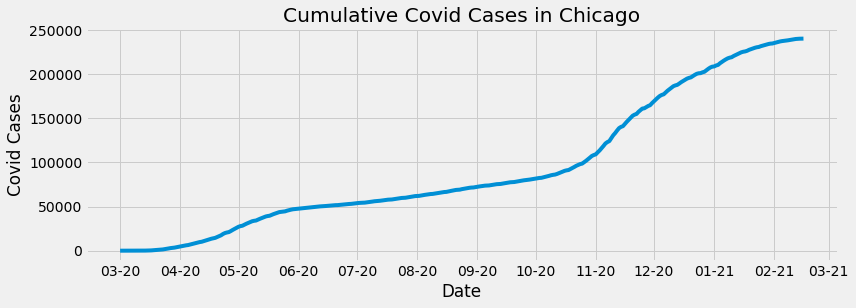

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(covid_daily_cases.Date, covid_daily_cases.Cumulative)
ax.set(xlabel="Date",
       ylabel="Covid Cases",
       title="Cumulative Covid Cases in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

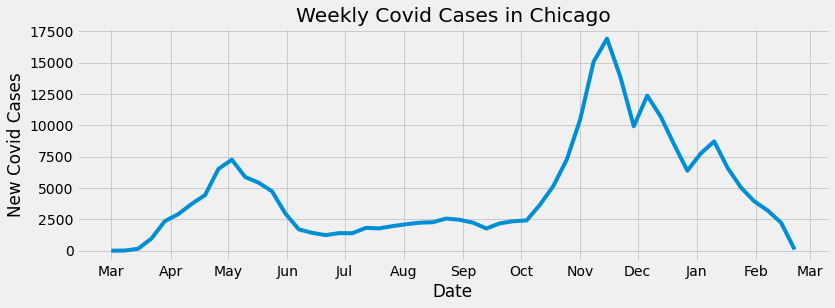

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(covid_weekly.Date, covid_weekly["cases"])
ax.set(xlabel="Date",
       ylabel="New Covid Cases",
       title="Weekly Covid Cases in Chicago")
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### "L" Rides

In [9]:
l_df = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')

In [10]:
l_df.date = pd.to_datetime(l_df.date)

In [11]:
l_df = l_df[(l_df.date.dt.year > 2018)]

In [12]:
l_df = l_df.groupby("date").sum().drop(columns='station_id').reset_index()

In [13]:
l_df

,date,rides
0,2019-01-01,199888
1,2019-01-02,469789
2,2019-01-03,514216
3,2019-01-04,514817
4,2019-01-05,279731
...,...,...
634,2020-09-26,109677
635,2020-09-27,83305
636,2020-09-28,131279
637,2020-09-29,138623


In [14]:
weekly_l = l_df.set_index(l_df.date)
weekly_l = weekly_l['rides'].resample('W').sum()
weekly_l = weekly_l.to_frame("rides").reset_index()

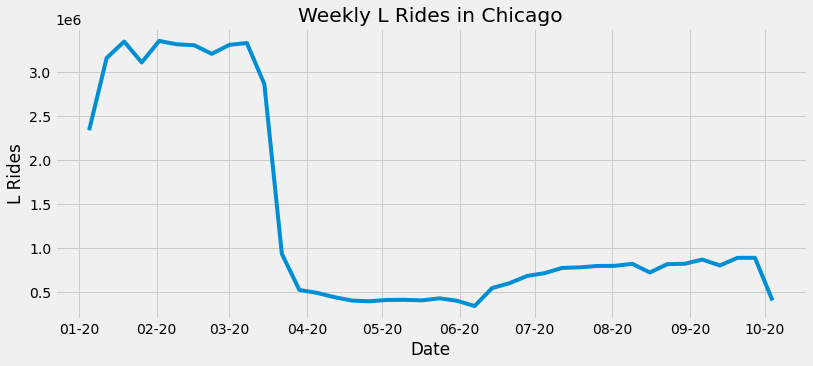

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))
filter_df = weekly_l[weekly_l.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="L Rides",
       title="Weekly L Rides in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### Bus Data

In [16]:
bus_df = pd.read_csv('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')

In [17]:
bus_df.date = pd.to_datetime(bus_df.date)
bus_df = bus_df[(bus_df.date.dt.year > 2018)]

In [18]:
bus_df = bus_df.groupby("date").sum().reset_index()

In [19]:
bus_df

,date,rides
0,2019-01-01,247279
1,2019-01-02,585996
2,2019-01-03,660631
3,2019-01-04,662011
4,2019-01-05,440848
...,...,...
634,2020-09-26,238224
635,2020-09-27,176309
636,2020-09-28,297845
637,2020-09-29,319813


In [20]:
weekly_bus = bus_df.set_index(bus_df.date)
weekly_bus = weekly_bus['rides'].resample('W').sum()
weekly_bus = weekly_bus.to_frame("rides").reset_index()

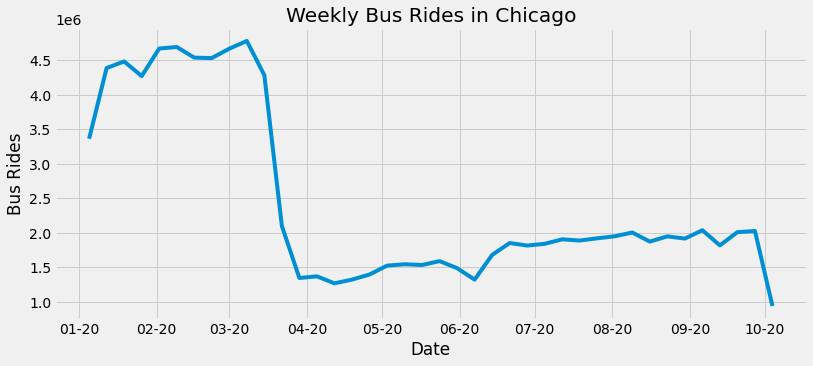

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
filter_df = weekly_bus[weekly_bus.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="Bus Rides",
       title="Weekly Bus Rides in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### Divvy Rides

In [22]:
divvy_2020q1 = pd.read_csv('Divvy_Trips_2020_Q1.csv')
divvy_2020april = pd.read_csv('202004-divvy-tripdata.csv')
divvy_2020may = pd.read_csv('202005-divvy-tripdata.csv')
divvy_2020june = pd.read_csv('202006-divvy-tripdata.csv')
divvy_2020july = pd.read_csv('202007-divvy-tripdata.csv')
divvy_2020august = pd.read_csv('202008-divvy-tripdata.csv')
divvy_2020sept = pd.read_csv('202009-divvy-tripdata.csv')
divvy_2020oct = pd.read_csv('202010-divvy-tripdata.csv')

In [23]:
divvy_2019q1 = pd.read_csv('Divvy_Trips_2019_Q1')
divvy_2019q2 = pd.read_csv('Divvy_Trips_2019_Q2')
divvy_2019q3 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
divvy_2019q4 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

In [24]:
divvy_2019 = pd.concat([divvy_2019q1, divvy_2019q3, divvy_2019q4], ignore_index = True)

In [25]:
divvy_2020 = pd.concat([divvy_2020q1, 
                      divvy_2020april, divvy_2020may, divvy_2020june, divvy_2020july, divvy_2020august, 
                      divvy_2020sept, divvy_2020oct], ignore_index = True)

In [26]:
divvy_2019["date"] = pd.to_datetime(divvy_2019.iloc[:, 1]).dt.normalize()
divvy_2020["date"] = pd.to_datetime(divvy_2020.started_at).dt.normalize()
divvy_2019q2["date"] = pd.to_datetime(divvy_2019q2.iloc[:, 1]).dt.normalize()

In [27]:
divvy_2019 = divvy_2019.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")
divvy_2020 = divvy_2020.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")
divvy_2019q2 = divvy_2019q2.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")

In [28]:
divvy_2019 = pd.concat([divvy_2019, divvy_2019q2], ignore_index = True).sort_values(by="date")

In [29]:
divvy_df = pd.concat([divvy_2019, divvy_2020], ignore_index = True)

In [30]:
divvy_df

,date,rides
0,2019-01-01,1312
1,2019-01-02,4170
2,2019-01-03,5618
3,2019-01-04,6793
4,2019-01-05,6179
...,...,...
663,2020-10-27,6178
664,2020-10-28,9661
665,2020-10-29,8139
666,2020-10-30,9378


In [31]:
weekly_divvy = divvy_df.set_index(divvy_df.date)
weekly_divvy = weekly_divvy['rides'].resample('W').sum()
weekly_divvy = weekly_divvy.to_frame("rides").reset_index()

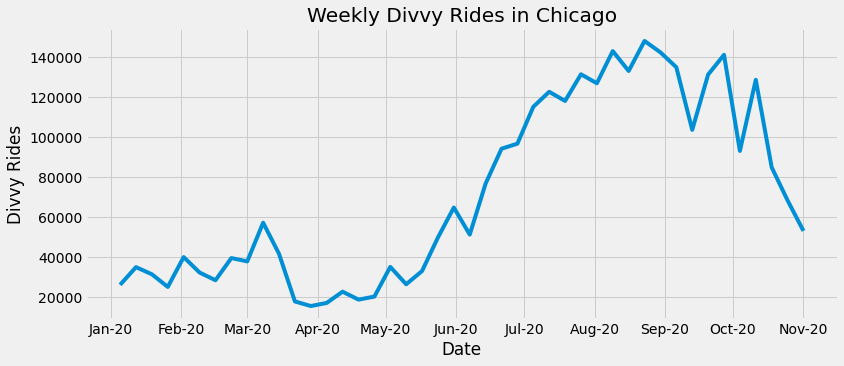

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))
filter_df = weekly_divvy[weekly_divvy.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="Divvy Rides",
       title="Weekly Divvy Rides in Chicago")

date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

## Cutting the Dataframe

The bus and L data only runs all the way to 2020-10-04, so we want to cut all our datasets to that date to make comparisons easier and consistent.

In [33]:
covid_weekly = covid_weekly[covid_weekly.Date <= '2020-10-04']

In [34]:
weekly_divvy = weekly_divvy[weekly_divvy.date <= '2020-10-04']
divvy_2019W = weekly_divvy[weekly_divvy.date <= '2019-10-11']
divvy_2020W = weekly_divvy[weekly_divvy.date.dt.year == 2020]
divvy_2020W = divvy_2020W.reset_index(drop=True)

In [35]:
bus_2019W = weekly_bus[weekly_bus.date <= '2019-10-11']
bus_2020W = weekly_bus[weekly_bus.date.dt.year == 2020]
bus_2020W = bus_2020W.reset_index(drop=True)

In [36]:
l_2019W = weekly_l[weekly_l.date <= '2019-10-11']
l_2020W = weekly_l[weekly_l.date.dt.year == 2020]
l_2020W = l_2020W.reset_index(drop=True)

## Plotting the share of bike rides in 2019 vs 2020

In [37]:
combined_2019W = l_2019W.merge(bus_2019W, on = 'date', suffixes = ['_l', '_bus'])
combined_2019W = combined_2019W.merge(divvy_2019W, on = 'date')
combined_2019W.rename(columns = {'rides': 'rides_divvy'}, inplace=True)
combined_2019W.head()

,date,rides_l,rides_bus,rides_divvy
0,2019-01-06,2190284,2913609,27749
1,2019-01-13,3265080,4415316,30930
2,2019-01-20,3382899,4507361,28005
3,2019-01-27,2985030,3856587,13994
4,2019-02-03,2327993,3078406,8871


In [38]:
combined_2019W["bike_percent"] = combined_2019W.rides_divvy / (combined_2019W.rides_l + combined_2019W.rides_bus) * 100
combined_2019W["ridership_ratio"] = (combined_2019W.rides_l + combined_2019W.rides_bus) / combined_2019W.rides_divvy

In [39]:
combined_2019W.head()

,date,rides_l,rides_bus,rides_divvy,bike_percent,ridership_ratio
0,2019-01-06,2190284,2913609,27749,0.543683,183.930700
1,2019-01-13,3265080,4415316,30930,0.402714,248.315422
2,2019-01-20,3382899,4507361,28005,0.354931,281.744688
3,2019-01-27,2985030,3856587,13994,0.204542,488.896456
4,2019-02-03,2327993,3078406,8871,0.164083,609.446398


In [40]:
combined_2020W = l_2020W.merge(bus_2020W, on = 'date', suffixes = ['_l', '_bus'])
combined_2020W = combined_2020W.merge(divvy_2020W, on = 'date')
combined_2020W.rename(columns = {'rides': 'rides_divvy'}, inplace=True)
combined_2020W.head()

,date,rides_l,rides_bus,rides_divvy
0,2020-01-05,2335393,3362254,26229
1,2020-01-12,3153480,4389248,35051
2,2020-01-19,3339678,4484116,31479
3,2020-01-26,3103740,4271733,25173
4,2020-02-02,3346621,4671589,40070


In [41]:
combined_2020W["bike_percent"] = combined_2020W.rides_divvy / (combined_2020W.rides_l + combined_2020W.rides_bus) * 100
combined_2020W["ridership_ratio"] = (combined_2020W.rides_l + combined_2020W.rides_bus) / combined_2020W.rides_divvy

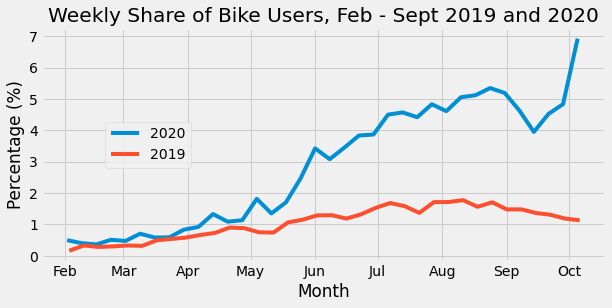

In [42]:
fig, ax = plt.subplots(figsize=(9, 4))
filter_df = combined_2020W[combined_2020W.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.bike_percent, label = "2020")
filter_df = combined_2019W[combined_2019W.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.bike_percent, label = "2019")

ax.set(xlabel="Month",
       ylabel="Percentage (%)",
       title="Weekly Share of Bike Users, Feb - Sept 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="center left", bbox_to_anchor=(0.1, 0.5), ncol=1)

plt.show()

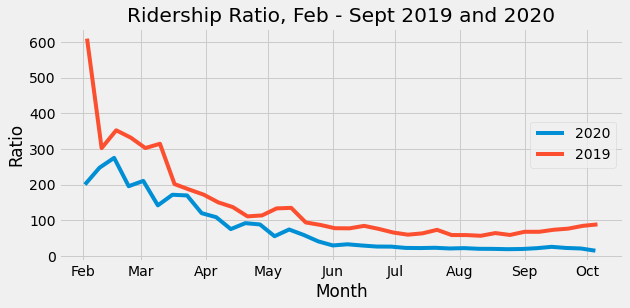

In [99]:
fig, ax = plt.subplots(figsize=(9, 4))
filter_df = combined_2020W[combined_2020W.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.ridership_ratio, label = "2020")
filter_df = combined_2019W[combined_2019W.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.ridership_ratio, label = "2019")

ax.set(xlabel="Month",
       ylabel="Ratio",
       title="Ridership Ratio, Feb - Sept 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="center right", ncol=1)

plt.show()

## Plotting the ridership trend of the three modes of transit in 2019 vs 2020

In [44]:
combined_2019W.head()

,date,rides_l,rides_bus,rides_divvy,bike_percent,ridership_ratio
0,2019-01-06,2190284,2913609,27749,0.543683,183.930700
1,2019-01-13,3265080,4415316,30930,0.402714,248.315422
2,2019-01-20,3382899,4507361,28005,0.354931,281.744688
3,2019-01-27,2985030,3856587,13994,0.204542,488.896456
4,2019-02-03,2327993,3078406,8871,0.164083,609.446398


In [45]:
combined_2020W.head()

,date,rides_l,rides_bus,rides_divvy,bike_percent,ridership_ratio
0,2020-01-05,2335393,3362254,26229,0.460348,217.227001
1,2020-01-12,3153480,4389248,35051,0.464699,215.192947
2,2020-01-19,3339678,4484116,31479,0.402350,248.540106
3,2020-01-26,3103740,4271733,25173,0.341307,292.991419
4,2020-02-02,3346621,4671589,40070,0.499737,200.105066


In [46]:
bus_comb = pd.DataFrame({'2019': combined_2019W.rides_bus, '2020': combined_2020W.rides_bus,
                        'date': combined_2020W.date})
l_comb = pd.DataFrame({'2019': combined_2019W.rides_l, '2020': combined_2020W.rides_l,
                        'date': combined_2020W.date})
divvy_comb = pd.DataFrame({'2019': combined_2019W.rides_divvy, '2020': combined_2020W.rides_divvy,
                        'date': combined_2020W.date})

In [47]:
bus_comb['relative_change'] = (bus_comb['2020'] - bus_comb['2019']) / bus_comb['2019'] * 100
l_comb['relative_change'] = (l_comb['2020'] - l_comb['2019']) / l_comb['2019'] * 100
divvy_comb['relative_change'] = (divvy_comb['2020'] - divvy_comb['2019']) / divvy_comb['2019'] * 100

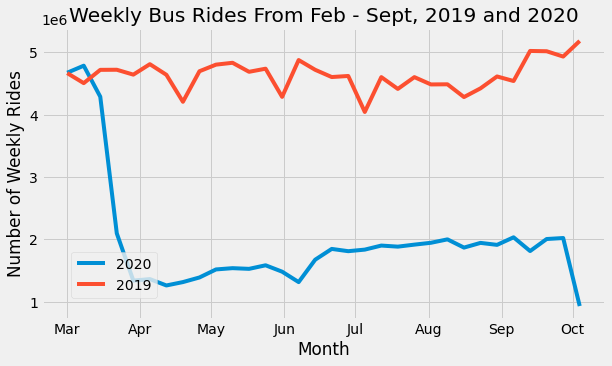

In [97]:
fig, ax = plt.subplots(figsize=(9, 5))
filter_df = bus_comb[bus_comb.date.dt.month >= 3]
ax.plot(filter_df.date, filter_df['2020'], label = "2020")
ax.plot(filter_df.date, filter_df['2019'], label = "2019")

ax.set(xlabel="Month",
       ylabel="Number of Weekly Rides",
       title="Weekly Bus Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower left", bbox_to_anchor=(0.04, 0.05), ncol=1)
plt.show()

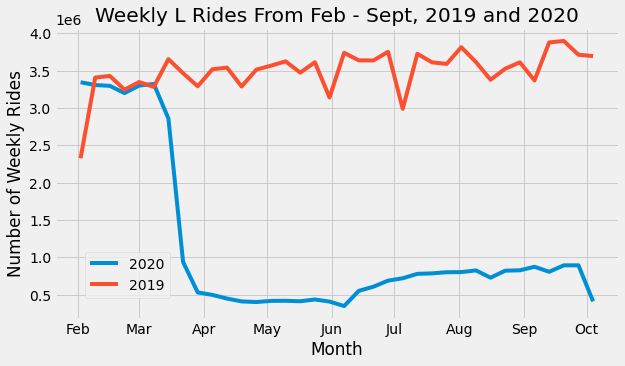

In [49]:
fig, ax = plt.subplots(figsize=(9, 5))
filter_df = l_comb[l_comb.date.dt.month >= 2]
ax.plot(filter_df.date, filter_df['2020'], label = "2020")
ax.plot(filter_df.date, filter_df['2019'], label = "2019")

ax.set(xlabel="Month",
       ylabel="Number of Weekly Rides",
       title="Weekly L Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower left", bbox_to_anchor=(0.04, 0.05), ncol=1)
plt.show()

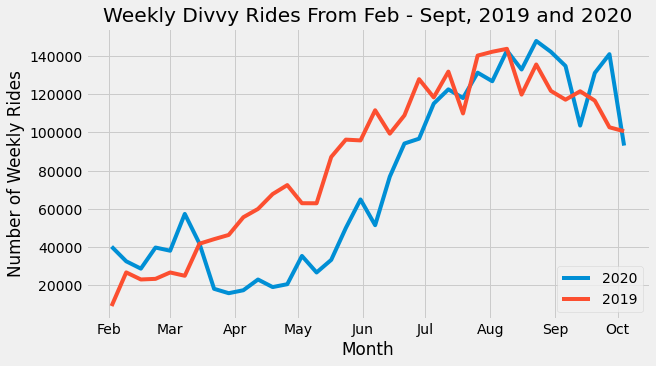

In [94]:
fig, ax = plt.subplots(figsize=(9, 5))
filter_df = divvy_comb[divvy_comb.date.dt.month >= 2]
ax.plot(filter_df.date, filter_df['2020'], label = "2020")
ax.plot(filter_df.date, filter_df['2019'], label = "2019")

ax.set(xlabel="Month",
       ylabel="Number of Weekly Rides",
       title="Weekly Divvy Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower right", ncol=1)
plt.show()

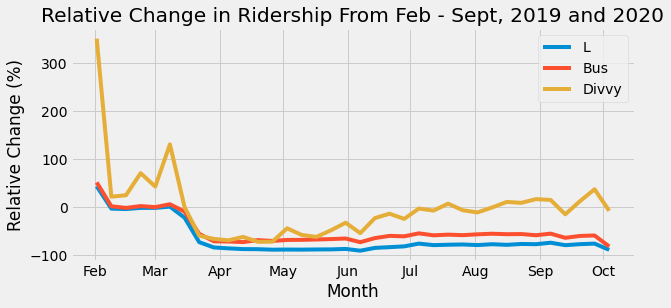

In [111]:
fig, ax = plt.subplots(figsize=(7, 4))
filter_l = l_comb[l_comb.date.dt.month >= 2]
filter_bus = bus_comb[bus_comb.date.dt.month >= 2]
filter_divvy = divvy_comb[divvy_comb.date.dt.month >= 2]

ax.plot(filter_l.date, filter_l['relative_change'], label = "L")
ax.plot(filter_l.date, filter_bus['relative_change'], label = "Bus")
ax.plot(filter_l.date, filter_divvy['relative_change'], label = "Divvy")

ax.set(xlabel="Month",
       ylabel="Relative Change (%)",
       title="Relative Change in Ridership \n(Feb - Sept, 2019 vs 2020)")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="upper right", ncol=1)
plt.show()

In [116]:
min(divvy_comb[divvy_comb.date.dt.month >= 3].relative_change)

-72.16950455244177

In [117]:
min(bus_comb[bus_comb.date.dt.month >= 3].relative_change)

-81.96010116177676

In [118]:
min(l_comb[l_comb.date.dt.month >= 3].relative_change)

-90.73123798163357

In [119]:
np.mean(divvy_comb[divvy_comb.date.dt.month >= 3].relative_change)

-16.43672501862167

In [120]:
np.mean(bus_comb[bus_comb.date.dt.month >= 3].relative_change)

-57.426005920434356

In [121]:
np.mean(l_comb[l_comb.date.dt.month >= 3].relative_change)

-75.12717031828616

## A/B Testing: 2019 vs 2020 Bike Share

In [52]:
filter_2020 = combined_2020W[combined_2020W.date.dt.month >= 3]
filter_2020.insert(5, "label", [2020] * filter_2020.shape[0])

In [53]:
filter_2019 = combined_2019W[combined_2019W.date.dt.month >= 3]
filter_2019.insert(5, "label", [2019] * filter_2019.shape[0])

In [54]:
bike_share = pd.concat([filter_2019.bike_percent, filter_2020.bike_percent], ignore_index = True)

In [55]:
labels = pd.concat([filter_2019.label, filter_2020.label], ignore_index = True)

In [56]:
main_table = pd.DataFrame({"label": labels, "bike_share": bike_share})

In [57]:
mean_table = main_table.groupby('label').mean()
mean_table

,bike_share
label,
2019,1.152144
2020,3.164123


In [58]:
observed_difference = mean_table.bike_share[2020] - mean_table.bike_share[2019]

In [59]:
observed_difference

2.011978518433372

In [60]:
differences = make_array()

for i in np.arange(10000):
    shuffled_share = main_table.bike_share.sample(main_table.shape[0], replace = False).reset_index(drop=True)
    shuffled_tbl = pd.DataFrame({'label': labels, 'shuffled_share': shuffled_share})
    means_tbl = shuffled_tbl.groupby('label').mean()
    new_diff = means_tbl.shuffled_share[2020] - means_tbl.shuffled_share[2019]
    differences = np.append(differences, new_diff)

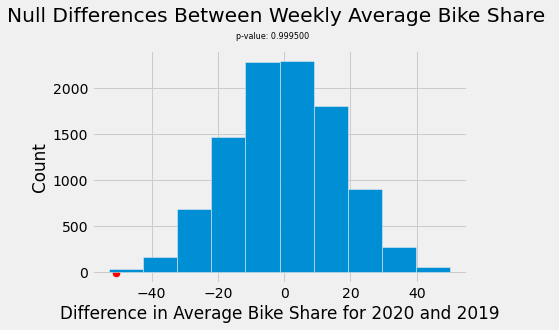

In [96]:
plt.scatter(observed_difference, -5, color='red', s=50)
plt.hist(differences)
plt.title("Null Differences Between Weekly Average Bike Share \n")
p_value = np.count_nonzero(differences >= observed_difference) / 10000
plt.suptitle("\np-value: %f" % p_value, fontsize=8)
plt.ylabel("Count")
plt.xlabel("Difference in Average Bike Share for 2020 and 2019")
plt.show()

The p-value is basically 0, meaning that a difference of approximately 2% in the weekly share of bikes as a mode of transit between the year 2020 and 2019 is not due to chance. This proves that the share of bikes in 2020 is indeed larger than 2019, and the result is statiscally significant at more than a 99% confidence level.

Assuming that the only conditions that are different between the years 2020 and 2019 is the pressence of the novel coronavirus Covid-19, this shows that Covid 19 is associated with higher shares of bike riding. However, it should be noted that this assumption might not be 100% accurate since factors such as weather, etc. might be slightly different between the two years. 

## A/B Testing: 2019 vs 2020 Ridership Ratio

In [62]:
filter_2020 = combined_2020W[combined_2020W.date.dt.month >= 3]
filter_2020.insert(5, "label", [2020] * filter_2020.shape[0])

In [63]:
filter_2019 = combined_2019W[combined_2019W.date.dt.month >= 3]
filter_2019.insert(5, "label", [2019] * filter_2019.shape[0])

In [64]:
ridership_ratio = pd.concat([filter_2019.ridership_ratio, filter_2020.ridership_ratio], ignore_index = True)

In [65]:
labels = pd.concat([filter_2019.label, filter_2020.label], ignore_index = True)

In [66]:
main_table = pd.DataFrame({"label": labels, "ridership_ratio": ridership_ratio})

In [67]:
mean_table = main_table.groupby('label').mean()
mean_table

,ridership_ratio
label,
2019,108.198327
2020,57.391264


In [68]:
observed_difference = mean_table.ridership_ratio[2020] - mean_table.ridership_ratio[2019]

In [69]:
observed_difference

-50.80706248680243

In [70]:
differences = make_array()

for i in np.arange(10000):
    shuffled_ratio = main_table.ridership_ratio.sample(main_table.shape[0], replace = False).reset_index(drop=True)
    shuffled_tbl = pd.DataFrame({'label': labels, 'shuffled_ratio': shuffled_ratio})
    means_tbl = shuffled_tbl.groupby('label').mean()
    new_diff = means_tbl.shuffled_ratio[2020] - means_tbl.shuffled_ratio[2019]
    differences = np.append(differences, new_diff)

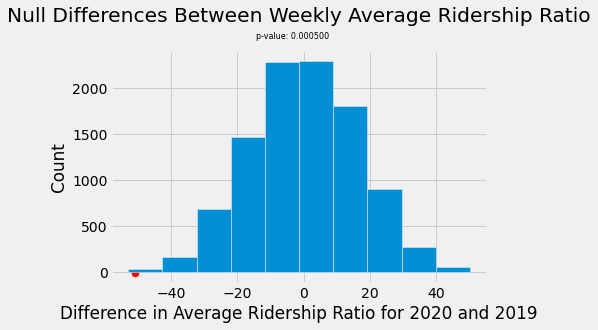

In [71]:
plt.scatter(observed_difference, -5, color='red', s=50)
plt.hist(differences)
plt.title("Null Differences Between Weekly Average Ridership Ratio\n")
p_value = np.count_nonzero(differences <= observed_difference) / 10000
plt.suptitle("\np-value: %f" % p_value, fontsize=8)
plt.ylabel("Count")
plt.xlabel("Difference in Average Ridership Ratio for 2020 and 2019")
plt.show()

The p-value is 0.0005, meaning that a difference of approximately 51 in the ridership ratio between the year 2020 and 2019 is not due to chance. This proves that ridership ratio in 2020 is indeed larger than 2019, and the result is statiscally significant at more than a 99% confidence level.

Assuming that the only conditions that are different between the years 2020 and 2019 is the pressence of the novel coronavirus Covid-19, this shows that bike ridership is more resilient to reduction in rides compared to non-bike public transportations. However, it should be noted that this assumption might not be 100% accurate since factors such as weather, etc. might be slightly different between the two years. 

### Regression between Ridership Ratio vs Weekly Covid Cases

In [72]:
janfeb_dates = combined_2020W[combined_2020W.date.dt.month <= 2].date.reset_index(drop=True)

In [73]:
upper_df = pd.DataFrame({"Date": janfeb_dates, "cases": np.zeros(janfeb_dates.shape[0])})

In [74]:
# Added January and February Rows to the Covid df
extended_covid_df = pd.concat([upper_df, covid_weekly], ignore_index = True)
extended_covid_df.rename(columns={'Date':'date'}, inplace=True)

In [75]:
# Merged covid and bike share data
covid_bike_share = pd.merge(combined_2020W, extended_covid_df, on = 'date')

In [76]:
covid_bike_share.drop(columns =['rides_l', 'rides_bus', 'rides_divvy'], inplace=True)

In [77]:
# Added weather data to control for temperature changes that might also affect the share of bikes
# Warmer temperature tend to lead to more bike users
weather_df = pd.read_csv('weather.csv')

In [78]:
weather_df = weather_df[["DATE", "TAVG"]]
weather_df["date"] = pd.to_datetime(weather_df.DATE)
weather_df = weather_df[weather_df.TAVG.notnull()]

In [79]:
weather_weekly = weather_df.set_index(weather_df.date)
weather_weekly = weather_weekly['TAVG'].resample('W').sum()
weather_weekly = weather_weekly.to_frame("TAVG").reset_index()

In [80]:
covid_bike_weather = pd.merge(covid_bike_share, weather_weekly, on='date')

In [81]:
covid_bike_weather.head()

,date,bike_percent,ridership_ratio,cases,TAVG
0,2020-01-05,0.460348,217.227001,0.0,171.0
1,2020-01-12,0.464699,215.192947,0.0,230.0
2,2020-01-19,0.402350,248.540106,0.0,180.0
3,2020-01-26,0.341307,292.991419,0.0,201.0
4,2020-02-02,0.499737,200.105066,0.0,238.0


In [82]:
import statsmodels.api as sm

In [101]:
filter_df = covid_bike_weather[covid_bike_weather.date.dt.month >= 3]

In [104]:
x = filter_df.loc[:, ["cases", 'TAVG']]
y = filter_df.ridership_ratio
x = sm.add_constant(x)

In [105]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        ridership_ratio   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     78.90
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.86e-12
Time:                        18:04:03   Log-Likelihood:                -142.42
No. Observations:                  32   AIC:                             290.8
Df Residuals:                      29   BIC:                             295.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        282.5294     18.496     15.275      0.0

Based on the table, the coefficient of new weekly covid cases is -0.0117, with a p-value of 0.000. This coefficient indicate that an increase in 1 weekly covid cases is associated with a decrease of 0.00117 in the ridership ratio. A decrease in ridership ratio indicates a narrowing of the gap between non-bike rides and bike rides, and based on the relative change plot we saw earlier, is caused by a relatively more resilient bike ridership in the face of decreased mobility due to Covid-19. This result is significant at more than a 99% confidence level and thus should not be attributed to chance. 

I have also controlled for the potential confounding effects of weather, which is known to greatly influence people's choice of transit, particularly bikes, in order to get a more accurate picture. 

In [ ]:
# Importing Data

### Covid Data

covid_daily_cases = pd.read_csv('COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv')

covid_daily_cases.Date = pd.to_datetime(covid_daily_cases.Date)
covid_daily_cases = covid_daily_cases.sort_values(by="Date")
covid_daily_cases = covid_daily_cases.iloc[:, :2]
covid_daily_cases.reset_index(inplace=True, drop=True)
covid_daily_cases["Cumulative"] = covid_daily_cases.iloc[:,1].cumsum()

covid_daily_cases

covid_weekly = covid_daily_cases.set_index(covid_daily_cases.Date)
covid_weekly = covid_weekly['Cases - Total'].resample('W').sum()

covid_weekly = covid_weekly.to_frame("cases").reset_index()

covid_weekly.head()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(covid_daily_cases.Date, covid_daily_cases.Cumulative)
ax.set(xlabel="Date",
       ylabel="Covid Cases",
       title="Cumulative Covid Cases in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(covid_weekly.Date, covid_weekly["cases"])
ax.set(xlabel="Date",
       ylabel="New Covid Cases",
       title="Weekly Covid Cases in Chicago")
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### "L" Rides

l_df = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')

l_df.date = pd.to_datetime(l_df.date)

l_df = l_df[(l_df.date.dt.year > 2018)]

l_df = l_df.groupby("date").sum().drop(columns='station_id').reset_index()

l_df

weekly_l = l_df.set_index(l_df.date)
weekly_l = weekly_l['rides'].resample('W').sum()
weekly_l = weekly_l.to_frame("rides").reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
filter_df = weekly_l[weekly_l.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="L Rides",
       title="Weekly L Rides in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### Bus Data

bus_df = pd.read_csv('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')

bus_df.date = pd.to_datetime(bus_df.date)
bus_df = bus_df[(bus_df.date.dt.year > 2018)]

bus_df = bus_df.groupby("date").sum().reset_index()

bus_df

weekly_bus = bus_df.set_index(bus_df.date)
weekly_bus = weekly_bus['rides'].resample('W').sum()
weekly_bus = weekly_bus.to_frame("rides").reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
filter_df = weekly_bus[weekly_bus.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="Bus Rides",
       title="Weekly Bus Rides in Chicago")
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

### Divvy Rides

divvy_2020q1 = pd.read_csv('Divvy_Trips_2020_Q1.csv')
divvy_2020april = pd.read_csv('202004-divvy-tripdata.csv')
divvy_2020may = pd.read_csv('202005-divvy-tripdata.csv')
divvy_2020june = pd.read_csv('202006-divvy-tripdata.csv')
divvy_2020july = pd.read_csv('202007-divvy-tripdata.csv')
divvy_2020august = pd.read_csv('202008-divvy-tripdata.csv')
divvy_2020sept = pd.read_csv('202009-divvy-tripdata.csv')
divvy_2020oct = pd.read_csv('202010-divvy-tripdata.csv')

divvy_2019q1 = pd.read_csv('Divvy_Trips_2019_Q1')
divvy_2019q2 = pd.read_csv('Divvy_Trips_2019_Q2')
divvy_2019q3 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
divvy_2019q4 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

divvy_2019 = pd.concat([divvy_2019q1, divvy_2019q3, divvy_2019q4], ignore_index = True)

divvy_2020 = pd.concat([divvy_2020q1, 
                      divvy_2020april, divvy_2020may, divvy_2020june, divvy_2020july, divvy_2020august, 
                      divvy_2020sept, divvy_2020oct], ignore_index = True)

divvy_2019["date"] = pd.to_datetime(divvy_2019.iloc[:, 1]).dt.normalize()
divvy_2020["date"] = pd.to_datetime(divvy_2020.started_at).dt.normalize()
divvy_2019q2["date"] = pd.to_datetime(divvy_2019q2.iloc[:, 1]).dt.normalize()

divvy_2019 = divvy_2019.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")
divvy_2020 = divvy_2020.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")
divvy_2019q2 = divvy_2019q2.groupby("date").size().to_frame("rides").reset_index().sort_values(by="date")

divvy_2019 = pd.concat([divvy_2019, divvy_2019q2], ignore_index = True).sort_values(by="date")

divvy_df = pd.concat([divvy_2019, divvy_2020], ignore_index = True)

divvy_df

weekly_divvy = divvy_df.set_index(divvy_df.date)
weekly_divvy = weekly_divvy['rides'].resample('W').sum()
weekly_divvy = weekly_divvy.to_frame("rides").reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
filter_df = weekly_divvy[weekly_divvy.date.dt.year == 2020]
ax.plot(filter_df.date, filter_df.rides)
ax.set(xlabel="Date",
       ylabel="Divvy Rides",
       title="Weekly Divvy Rides in Chicago")

date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

## Cutting the Dataframe

The bus and L data only runs all the way to 2020-10-04, so we want to cut all our datasets to that date to make comparisons easier and consistent.

covid_weekly = covid_weekly[covid_weekly.Date <= '2020-10-04']

weekly_divvy = weekly_divvy[weekly_divvy.date <= '2020-10-04']
divvy_2019W = weekly_divvy[weekly_divvy.date <= '2019-10-11']
divvy_2020W = weekly_divvy[weekly_divvy.date.dt.year == 2020]
divvy_2020W = divvy_2020W.reset_index(drop=True)

bus_2019W = weekly_bus[weekly_bus.date <= '2019-10-11']
bus_2020W = weekly_bus[weekly_bus.date.dt.year == 2020]
bus_2020W = bus_2020W.reset_index(drop=True)

l_2019W = weekly_l[weekly_l.date <= '2019-10-11']
l_2020W = weekly_l[weekly_l.date.dt.year == 2020]
l_2020W = l_2020W.reset_index(drop=True)

## Plotting the share of bike rides in 2019 vs 2020

combined_2019W = l_2019W.merge(bus_2019W, on = 'date', suffixes = ['_l', '_bus'])
combined_2019W = combined_2019W.merge(divvy_2019W, on = 'date')
combined_2019W.rename(columns = {'rides': 'rides_divvy'}, inplace=True)
combined_2019W.head()

combined_2019W["bike_percent"] = combined_2019W.rides_divvy / (combined_2019W.rides_l + combined_2019W.rides_bus) * 100
combined_2019W["ridership_ratio"] = (combined_2019W.rides_l + combined_2019W.rides_bus) / combined_2019W.rides_divvy

combined_2019W.head()

combined_2020W = l_2020W.merge(bus_2020W, on = 'date', suffixes = ['_l', '_bus'])
combined_2020W = combined_2020W.merge(divvy_2020W, on = 'date')
combined_2020W.rename(columns = {'rides': 'rides_divvy'}, inplace=True)
combined_2020W.head()

combined_2020W["bike_percent"] = combined_2020W.rides_divvy / (combined_2020W.rides_l + combined_2020W.rides_bus) * 100
combined_2020W["ridership_ratio"] = (combined_2020W.rides_l + combined_2020W.rides_bus) / combined_2020W.rides_divvy

fig, ax = plt.subplots(figsize=(9, 4))
filter_df = combined_2020W[combined_2020W.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.bike_percent, label = "2020")
filter_df = combined_2019W[combined_2019W.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.bike_percent, label = "2019")

ax.set(xlabel="Month",
       ylabel="Percentage (%)",
       title="Weekly Share of Bike Users, Feb - Sept 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="center left", bbox_to_anchor=(0.1, 0.5), ncol=1)

plt.show()

fig, ax = plt.subplots(figsize=(9, 4))
filter_df = combined_2020W[combined_2020W.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.ridership_ratio, label = "2020")
filter_df = combined_2019W[combined_2019W.date.dt.month >= 2]
ax.plot(filter_df.date.dt.dayofyear, filter_df.ridership_ratio, label = "2019")

ax.set(xlabel="Month",
       ylabel="Ratio",
       title="Ridership Ratio, Feb - Sept 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="center right", ncol=1)

plt.show()

## Plotting the ridership trend of the three modes of transit in 2019 vs 2020

combined_2019W.head()

combined_2020W.head()

bus_comb = pd.DataFrame({'2019': combined_2019W.rides_bus, '2020': combined_2020W.rides_bus,
                        'date': combined_2020W.date})
l_comb = pd.DataFrame({'2019': combined_2019W.rides_l, '2020': combined_2020W.rides_l,
                        'date': combined_2020W.date})
divvy_comb = pd.DataFrame({'2019': combined_2019W.rides_divvy, '2020': combined_2020W.rides_divvy,
                        'date': combined_2020W.date})

bus_comb['relative_change'] = (bus_comb['2020'] - bus_comb['2019']) / bus_comb['2019'] * 100
l_comb['relative_change'] = (l_comb['2020'] - l_comb['2019']) / l_comb['2019'] * 100
divvy_comb['relative_change'] = (divvy_comb['2020'] - divvy_comb['2019']) / divvy_comb['2019'] * 100

fig, ax = plt.subplots(figsize=(9, 5))
filter_df = bus_comb[bus_comb.date.dt.month >= 3]
ax.plot(filter_df.date, filter_df['2020'], label = "2020")
ax.plot(filter_df.date, filter_df['2019'], label = "2019")

ax.set(xlabel="Month",
       ylabel="Number of Weekly Rides",
       title="Weekly Bus Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower left", bbox_to_anchor=(0.04, 0.05), ncol=1)
plt.show()

fig, ax = plt.subplots(figsize=(9, 5))
filter_df = l_comb[l_comb.date.dt.month >= 2]
ax.plot(filter_df.date, filter_df['2020'], label = "2020")
ax.plot(filter_df.date, filter_df['2019'], label = "2019")

ax.set(xlabel="Month",
       ylabel="Number of Weekly Rides",
       title="Weekly L Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower left", bbox_to_anchor=(0.04, 0.05), ncol=1)
plt.show()

fig, ax = plt.subplots(figsize=(9, 5))
filter_df = divvy_comb[divvy_comb.date.dt.month >= 2]
ax.plot(filter_df.date, filter_df['2020'], label = "2020")
ax.plot(filter_df.date, filter_df['2019'], label = "2019")

ax.set(xlabel="Month",
       ylabel="Number of Weekly Rides",
       title="Weekly Divvy Rides From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="lower right", ncol=1)
plt.show()

fig, ax = plt.subplots(figsize=(9, 4))
filter_l = l_comb[l_comb.date.dt.month >= 2]
filter_bus = bus_comb[bus_comb.date.dt.month >= 2]
filter_divvy = divvy_comb[divvy_comb.date.dt.month >= 2]

ax.plot(filter_l.date, filter_l['relative_change'], label = "L")
ax.plot(filter_l.date, filter_bus['relative_change'], label = "Bus")
ax.plot(filter_l.date, filter_divvy['relative_change'], label = "Divvy")

ax.set(xlabel="Month",
       ylabel="Relative Change (%)",
       title="Relative Change in Ridership From Feb - Sept, 2019 and 2020")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.legend(loc ="upper right", ncol=1)
plt.show()

min(divvy_comb[divvy_comb.date.dt.month >= 3].relative_change)

min(bus_comb[bus_comb.date.dt.month >= 3].relative_change)

min(l_comb[l_comb.date.dt.month >= 3].relative_change)

np.mean(divvy_comb[divvy_comb.date.dt.month >= 3].relative_change)

np.mean(bus_comb[bus_comb.date.dt.month >= 3].relative_change)

np.mean(l_comb[l_comb.date.dt.month >= 3].relative_change)

## A/B Testing: 2019 vs 2020 Bike Share

filter_2020 = combined_2020W[combined_2020W.date.dt.month >= 3]
filter_2020.insert(5, "label", [2020] * filter_2020.shape[0])

filter_2019 = combined_2019W[combined_2019W.date.dt.month >= 3]
filter_2019.insert(5, "label", [2019] * filter_2019.shape[0])

bike_share = pd.concat([filter_2019.bike_percent, filter_2020.bike_percent], ignore_index = True)

labels = pd.concat([filter_2019.label, filter_2020.label], ignore_index = True)

main_table = pd.DataFrame({"label": labels, "bike_share": bike_share})

mean_table = main_table.groupby('label').mean()
mean_table

observed_difference = mean_table.bike_share[2020] - mean_table.bike_share[2019]

observed_difference

differences = make_array()

for i in np.arange(10000):
    shuffled_share = main_table.bike_share.sample(main_table.shape[0], replace = False).reset_index(drop=True)
    shuffled_tbl = pd.DataFrame({'label': labels, 'shuffled_share': shuffled_share})
    means_tbl = shuffled_tbl.groupby('label').mean()
    new_diff = means_tbl.shuffled_share[2020] - means_tbl.shuffled_share[2019]
    differences = np.append(differences, new_diff)

plt.scatter(observed_difference, -5, color='red', s=50)
plt.hist(differences)
plt.title("Null Differences Between Weekly Average Bike Share \n")
p_value = np.count_nonzero(differences >= observed_difference) / 10000
plt.suptitle("\np-value: %f" % p_value, fontsize=8)
plt.ylabel("Count")
plt.xlabel("Difference in Average Bike Share for 2020 and 2019")
plt.show()

The p-value is basically 0, meaning that a difference of approximately 2% in the weekly share of bikes as a mode of transit between the year 2020 and 2019 is not due to chance. This proves that the share of bikes in 2020 is indeed larger than 2019, and the result is statiscally significant at more than a 99% confidence level.

Assuming that the only conditions that are different between the years 2020 and 2019 is the pressence of the novel coronavirus Covid-19, this shows that Covid 19 is associated with higher shares of bike riding. However, it should be noted that this assumption might not be 100% accurate since factors such as weather, etc. might be slightly different between the two years. 

## A/B Testing: 2019 vs 2020 Ridership Ratio

filter_2020 = combined_2020W[combined_2020W.date.dt.month >= 3]
filter_2020.insert(5, "label", [2020] * filter_2020.shape[0])

filter_2019 = combined_2019W[combined_2019W.date.dt.month >= 3]
filter_2019.insert(5, "label", [2019] * filter_2019.shape[0])

ridership_ratio = pd.concat([filter_2019.ridership_ratio, filter_2020.ridership_ratio], ignore_index = True)

labels = pd.concat([filter_2019.label, filter_2020.label], ignore_index = True)

main_table = pd.DataFrame({"label": labels, "ridership_ratio": ridership_ratio})

mean_table = main_table.groupby('label').mean()
mean_table

observed_difference = mean_table.ridership_ratio[2020] - mean_table.ridership_ratio[2019]

observed_difference

differences = make_array()

for i in np.arange(10000):
    shuffled_ratio = main_table.ridership_ratio.sample(main_table.shape[0], replace = False).reset_index(drop=True)
    shuffled_tbl = pd.DataFrame({'label': labels, 'shuffled_ratio': shuffled_ratio})
    means_tbl = shuffled_tbl.groupby('label').mean()
    new_diff = means_tbl.shuffled_ratio[2020] - means_tbl.shuffled_ratio[2019]
    differences = np.append(differences, new_diff)

plt.scatter(observed_difference, -5, color='red', s=50)
plt.hist(differences)
plt.title("Null Differences Between Weekly Average Ridership Ratio\n")
p_value = np.count_nonzero(differences <= observed_difference) / 10000
plt.suptitle("\np-value: %f" % p_value, fontsize=8)
plt.ylabel("Count")
plt.xlabel("Difference in Average Ridership Ratio for 2020 and 2019")
plt.show()

The p-value is 0.0005, meaning that a difference of approximately 51 in the ridership ratio between the year 2020 and 2019 is not due to chance. This proves that ridership ratio in 2020 is indeed larger than 2019, and the result is statiscally significant at more than a 99% confidence level.

Assuming that the only conditions that are different between the years 2020 and 2019 is the pressence of the novel coronavirus Covid-19, this shows that bike ridership is more resilient to reduction in rides compared to non-bike public transportations. However, it should be noted that this assumption might not be 100% accurate since factors such as weather, etc. might be slightly different between the two years. 

### Regression between Ridership Ratio vs Weekly Covid Cases

janfeb_dates = combined_2020W[combined_2020W.date.dt.month <= 2].date.reset_index(drop=True)

upper_df = pd.DataFrame({"Date": janfeb_dates, "cases": np.zeros(janfeb_dates.shape[0])})

# Added January and February Rows to the Covid df
extended_covid_df = pd.concat([upper_df, covid_weekly], ignore_index = True)
extended_covid_df.rename(columns={'Date':'date'}, inplace=True)

# Merged covid and bike share data
covid_bike_share = pd.merge(combined_2020W, extended_covid_df, on = 'date')

covid_bike_share.drop(columns =['rides_l', 'rides_bus', 'rides_divvy'], inplace=True)

# Added weather data to control for temperature changes that might also affect the share of bikes
# Warmer temperature tend to lead to more bike users
weather_df = pd.read_csv('weather.csv')

weather_df = weather_df[["DATE", "TAVG"]]
weather_df["date"] = pd.to_datetime(weather_df.DATE)
weather_df = weather_df[weather_df.TAVG.notnull()]

weather_weekly = weather_df.set_index(weather_df.date)
weather_weekly = weather_weekly['TAVG'].resample('W').sum()
weather_weekly = weather_weekly.to_frame("TAVG").reset_index()

covid_bike_weather = pd.merge(covid_bike_share, weather_weekly, on='date')

covid_bike_weather.head()

import statsmodels.api as sm

filter_df = covid_bike_weather[covid_bike_weather.date.dt.month >= 3]

x = filter_df.loc[:, ["cases", 'TAVG']]
y = filter_df.ridership_ratio
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

Based on the table, the coefficient of new weekly covid cases is -0.0117, with a p-value of 0.000. This coefficient indicate that an increase in 1 weekly covid cases is associated with a decrease of 0.00117 in the ridership ratio. A decrease in ridership ratio indicates a narrowing of the gap between non-bike rides and bike rides, and based on the relative change plot we saw earlier, is caused by a relatively more resilient bike ridership in the face of decreased mobility due to Covid-19. This result is significant at more than a 99% confidence level and thus should not be attributed to chance. 

I have also controlled for the potential confounding effects of weather, which is known to greatly influence people's choice of transit, particularly bikes, in order to get a more accurate picture. 